In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Overview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


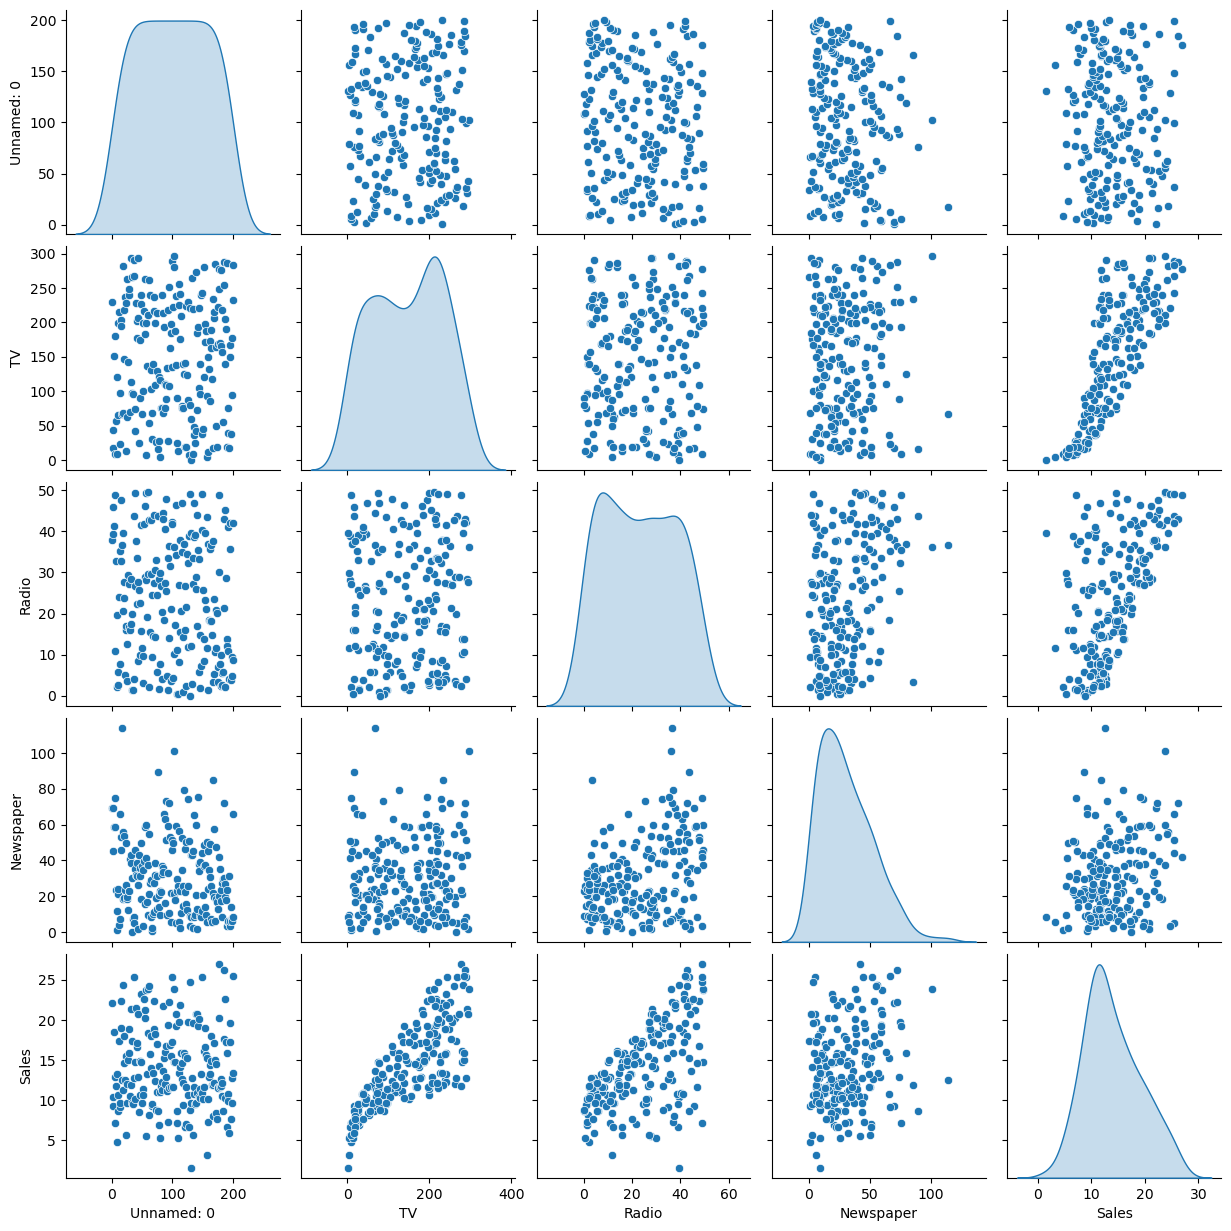

In [5]:
sns.pairplot(df, diag_kind='kde')
plt.show()

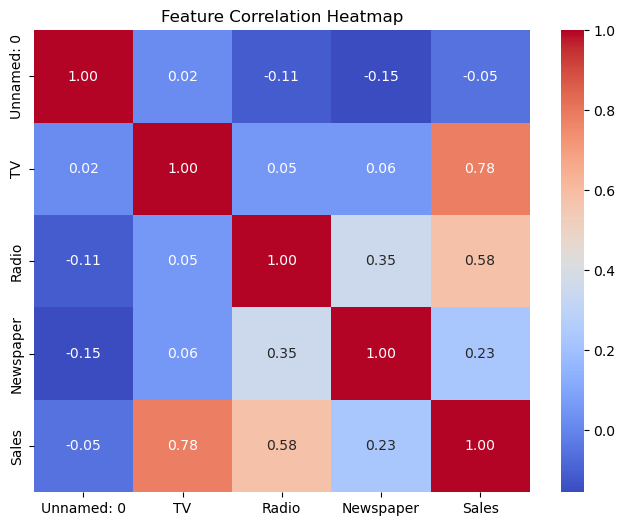

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Absolute Error: 1.46
Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared Score: 0.90


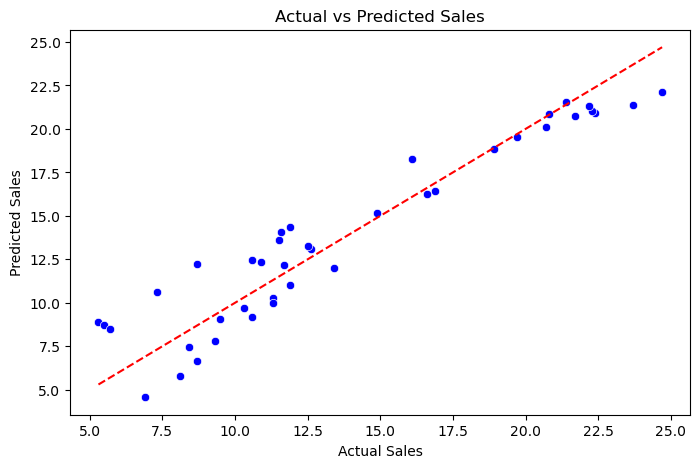

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

C:\Users\dhrut\AppData\Local\Temp\ipykernel_12952\1336545279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=model.coef_, palette='viridis')


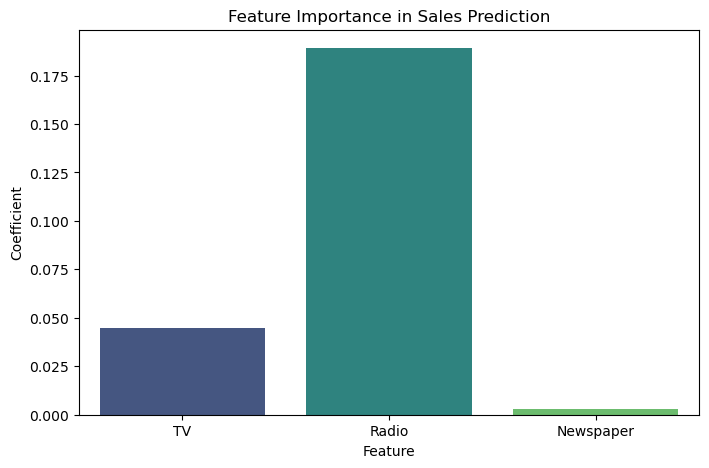

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=X.columns, y=model.coef_, palette='viridis')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance in Sales Prediction')
plt.show()

In [15]:
y_pred = model.predict(X_test)
df_results = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(df_results.head())  # Display first few results

     Actual Sales  Predicted Sales
95           16.9        16.408024
15           22.4        20.889882
30           21.4        21.553843
158           7.3        10.608503
128          24.7        22.112373


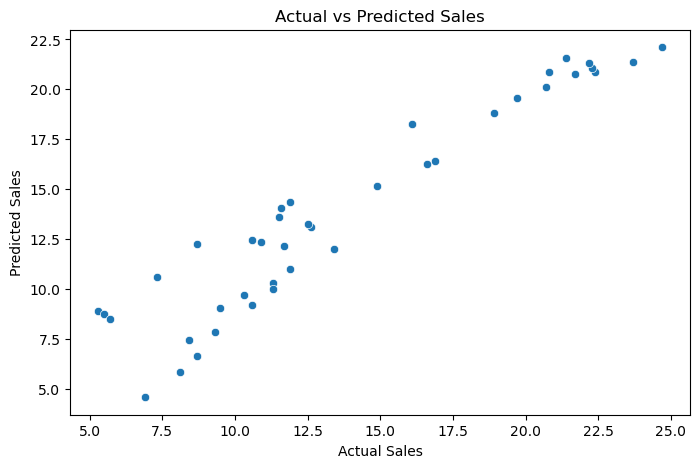

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()